In [1]:
import pandas as pd


In [165]:
## train, test datasets are from the dataquest course
#data = pd.read_csv('AmesHousing.tsv', delimiter='\t')

## train, test datasets are from kaggle
train = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv')

In [180]:
train.shape
test.shape

(1460, 81)

(1459, 80)

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
from xgboost import XGBRegressor

In [5]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

In [9]:
null_counts = data.isnull().sum()
null_counts = null_counts[null_counts > 0]
null_counts

Lot Frontage       490
Alley             2732
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

In [13]:
object_df = data.select_dtypes('object').copy()
object_df.shape
object_df.isnull().sum()

(2930, 43)

MS Zoning            0
Street               0
Alley             2732
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin Type 2      81
Heating              0
Heating QC           0
Central Air          0
Electrical           1
Kitchen Qual         0
Functional           0
Fireplace Qu      1422
Garage Type        157
Garage Finish      159
Garage Qual        159
Garage Cond        159
Paved Drive          0
Pool QC           2917
Fence             2358
Misc Feature      2824
Sale Type            0
Sale Condition       0
dtype: int6

In [15]:
import numpy as np
numerical_df = data.select_dtypes(np.number).copy()
numerical_df.shape
numerical_df.isnull().sum()

(2930, 39)

Order                0
PID                  0
MS SubClass          0
Lot Frontage       490
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        23
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      159
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64

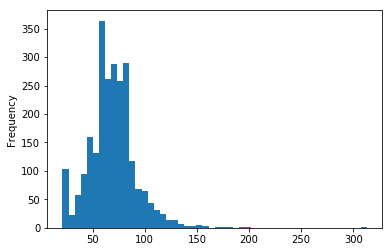

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

numerical_df['Lot Frontage'].plot.hist(bins=50)

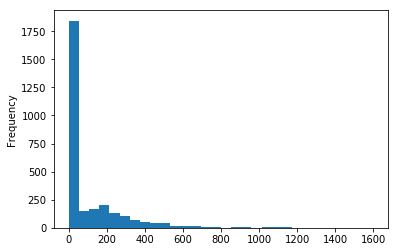

In [21]:
numerical_df['Mas Vnr Area'].plot.hist(bins=30)

In [25]:
numerical_df['Mas Vnr Area'] = numerical_df['Mas Vnr Area'].fillna(numerical_df['Mas Vnr Area'].mode()[0])

C:\Users\linta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
numerical_df = numerical_df.apply(lambda x: x.fillna(x.mode()[0]))

Fill the Null value of numerical type with the corresponding mode.

In [74]:
## Check the raw data from Kaggle original datasets

kdata = pd.concat([train.drop('SalePrice', axis=1), test], ignore_index=True)
kdata.shape

(2919, 80)

In [75]:
knumerical_df = kdata.select_dtypes(np.number).copy()
knumerical_df.shape
knumerical_df.isnull().sum()

(2919, 37)

Id                 0
MSSubClass         0
LotFrontage      486
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      159
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [76]:
knumerical_df = knumerical_df.apply(lambda x: x.fillna(x.mode()[0]))
knumerical_df.isnull().sum().sum()

0

In [77]:
kobject_df = kdata.select_dtypes('object').copy()
kobject_df.shape
kobject_df.describe()

(2919, 43)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2915,2919,198,2919,2919,2917,2919,2919,2919,2919,...,2762,2760,2760,2760,2919,10,571,105,2918,2919
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2265,2907,120,1859,2622,2916,2133,2778,443,2511,...,1723,1230,2604,2654,2641,4,329,95,2525,2402


In [78]:
kobject_df.describe().loc['unique', :].sort_values()

Street            2
Alley             2
CentralAir        2
Utilities         2
LandSlope         3
PoolQC            3
PavedDrive        3
GarageFinish      3
BsmtQual          4
ExterQual         4
MasVnrType        4
KitchenQual       4
BsmtCond          4
BsmtExposure      4
Fence             4
MiscFeature       4
LandContour       4
LotShape          4
FireplaceQu       5
Electrical        5
HeatingQC         5
GarageQual        5
GarageCond        5
MSZoning          5
LotConfig         5
BldgType          5
ExterCond         5
BsmtFinType1      6
RoofStyle         6
GarageType        6
Foundation        6
Heating           6
BsmtFinType2      6
SaleCondition     6
Functional        7
RoofMatl          8
HouseStyle        8
Condition2        8
SaleType          9
Condition1        9
Exterior1st      15
Exterior2nd      16
Neighborhood     25
Name: unique, dtype: object

In [79]:
null_counts = kobject_df.isnull().sum()
large_null_cols = null_counts[null_counts>100]
large_null_cols

Alley           2721
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
dtype: int64

In [110]:
for col in large_null_cols.index:
    kobject_df[col].value_counts(dropna=False)

NaN    1420
Gd      744
TA      592
Fa       74
Po       46
Ex       43
Name: FireplaceQu, dtype: int64

No    2906
Ex       6
Gd       5
Fa       2
Name: PoolQC, dtype: int64

NaN      2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

NaN     2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

In [83]:
kobject_df = kobject_df.drop('Alley', axis=1)

In [84]:
## Two entries of GarageType have not other attributes
garage = 'GarageType GarageFinish GarageQual GarageCond'.split(' ')
total = kobject_df['Street'].notnull()
for col in garage:
    print(total.sum())
    total &= kobject_df[col].isnull()
    

2919
157
157
157


In [85]:
two_garage = kobject_df['GarageType'].notnull()&kobject_df['GarageFinish'].isnull()
abnormal_indexs = two_garage[two_garage].index
abnormal_indexs 

Int64Index([2126, 2576], dtype='int64')

In [86]:
kobject_df.loc[abnormal_indexs, garage]

,GarageType,GarageFinish,GarageQual,GarageCond
2126,Detchd,NaN,NaN,NaN
2576,Detchd,NaN,NaN,NaN


In [93]:
## Feed the other garage attributes with the modes of the same category of 'Detchd'
garage_params = kobject_df[kobject_df['GarageType'] == 'Detchd'][garage].mode()
garage_params

,GarageType,GarageFinish,GarageQual,GarageCond
0,Detchd,Unf,TA,TA


In [95]:
for i in abnormal_indexs:
    kobject_df.loc[i, garage] = garage_params.loc[0]

In [96]:
kobject_df.loc[abnormal_indexs, garage]

,GarageType,GarageFinish,GarageQual,GarageCond
2126,Detchd,Unf,TA,TA
2576,Detchd,Unf,TA,TA


In [116]:
#kobject_df[garage] = kobject_df[garage].fillna('None')
null_counts = kobject_df.isnull().sum()
large_null_cols = null_counts[null_counts>100]
large_null_cols

Fence    2348
dtype: int64

In [98]:
knumerical_df['Fireplaces'].value_counts() ## FireplaceQu corresponding to #

0    1420
1    1268
2     219
3      11
4       1
Name: Fireplaces, dtype: int64

In [100]:
knumerical_df['PoolArea'].value_counts()
kobject_df['PoolQC'].value_counts()

0      2906
561       1
555       1
519       1
800       1
738       1
648       1
576       1
512       1
480       1
444       1
368       1
228       1
144       1
Name: PoolArea, dtype: int64

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

In [103]:
# Explore the three pool without quality score
pool_index = knumerical_df['PoolArea'] != 0
pd.concat([knumerical_df['PoolArea'][pool_index].copy(), kobject_df['PoolQC'][pool_index].copy()], axis=1).sort_values(by='PoolArea')

,PoolArea,PoolQC
1974,144,Ex
2573,228,Ex
2420,368,NaN
2503,444,NaN
1298,480,Gd
197,512,Ex
1386,519,Fa
1182,555,Ex
2599,561,NaN
1170,576,Gd


In [105]:
kobject_df.loc[[2420, 2503], 'PoolQC'] = 'Ex'
kobject_df.loc[2599, 'PoolQC'] = 'Gd'
pool_index = knumerical_df['PoolArea'] != 0
pd.concat([knumerical_df['PoolArea'][pool_index].copy(), kobject_df['PoolQC'][pool_index].copy()], axis=1).sort_values(by='PoolArea')

,PoolArea,PoolQC
1974,144,Ex
2573,228,Ex
2420,368,Ex
2503,444,Ex
1298,480,Gd
197,512,Ex
1386,519,Fa
1182,555,Ex
2599,561,Gd
1170,576,Gd


In [109]:
kobject_df['PoolQC'] = kobject_df['PoolQC'].replace(np.nan, 'No')
pool_quality = {'Ex': 1, 'Gd': 0.7, 'Fa':0.4, 'No': 0} ## set a scale to combined with area

knumerical_df['Pool_combined'] = kobject_df['PoolQC'].replace(pool_quality)\
*knumerical_df['PoolArea']
knumerical_df['Pool_combined'].value_counts()

0.0      2906
392.7       1
444.0       1
555.0       1
207.6       1
560.0       1
228.0       1
516.6       1
403.2       1
259.2       1
368.0       1
144.0       1
336.0       1
512.0       1
Name: Pool_combined, dtype: int64

In [112]:
kobject_df['FireplaceQu'] = kobject_df['FireplaceQu'].replace(np.nan, 'No')

In [115]:
kobject_df['MiscFeature'] = kobject_df['MiscFeature'].fillna('None')

In [117]:
kobject_df['Fence'] = kobject_df['Fence'].fillna('None')

In [119]:
null_counts = kobject_df.isnull().sum()
null_counts[null_counts != 0]

MSZoning         4
Utilities        2
Exterior1st      1
Exterior2nd      1
MasVnrType      24
BsmtQual        81
BsmtCond        82
BsmtExposure    82
BsmtFinType1    79
BsmtFinType2    80
Electrical       1
KitchenQual      1
Functional       2
SaleType         1
dtype: int64

In [149]:
#bsmt = null_counts[null_counts > 78].index
#bsmt_df = kobject_df[bsmt].copy()
for col in bsmt:
    bsmt_df[col].value_counts(dropna=False)

TA      1285
Gd      1209
Ex       258
Fa        88
None      79
Name: BsmtQual, dtype: int64

TA      2609
Gd       122
Fa       104
None      79
Po         5
Name: BsmtCond, dtype: int64

No      1907
Av       418
Gd       276
Mn       239
None      79
Name: BsmtExposure, dtype: int64

Unf     851
GLQ     849
ALQ     429
Rec     288
BLQ     269
LwQ     154
None     79
Name: BsmtFinType1, dtype: int64

Unf     2494
Rec      105
LwQ       87
None      79
BLQ       68
ALQ       52
GLQ       34
Name: BsmtFinType2, dtype: int64

In [125]:
## Fill bastment attributes with None for those have no basement
bsmt_index = knumerical_df['TotalBsmtSF'] == 0
bsmt_df.loc[bsmt_index, bsmt] = 'None'

In [140]:
bsmt_df[bsmt_df['BsmtFinType2'].isnull()]
## knumerical_df.loc[332, 'BsmtFinSF2']
## bsmt_df.loc[332, 'BsmtFinType2'] = bsmt_df['BsmtFinType2'].mode().loc[0]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2


In [148]:
#bsmt_df.loc[bsmt_df['BsmtExposure'].isnull(), 'BsmtExposure'] = 'No'
bsmt_df = bsmt_df.fillna('TA')


##bsmt_df[(bsmt_df['BsmtQual'] == 'Gd') &\
##        (bsmt_df['BsmtCond'] == 'TA') & \
##        (bsmt_df['BsmtFinType1'] == 'Unf') &\
##       (bsmt_df['BsmtFinType2'] == 'Unf')].mode().loc[0] ## mode --> No

Fill Nan values for the basement options!

In [156]:
#kobject_df[bsmt] = bsmt_df
kobject_df.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [152]:
knumerical_df.loc[kobject_df['SaleType'].isnull(), ['YearBuilt', 'YrSold']]

,YearBuilt,YrSold
2489,1958,2007


In [153]:
kobject_df['SaleType'].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [155]:
kobject_df = kobject_df.apply(lambda x: x.fillna(x.mode().loc[0]))

Fill all the Null values

In [162]:
dummy_df = pd.get_dummies(kobject_df)

In [163]:
dummy_df.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [199]:
kdata1 = pd.concat([knumerical_df, kobject_df], axis=1)
train_df1 = kdata1.loc[:1459].copy()
test_df1 = kdata1.loc[1460:].copy()
target_df1= np.log(train['SalePrice'])

In [200]:
train_df1.shape

(1460, 80)

In [240]:
kdata1.to_csv('Data_cat.csv', index=False)

In [241]:
kdata2.to_csv('Data_dummies.csv', index=False)

In [242]:
target_df.to_csv('target_log.csv', index=False)

In [164]:
kdata2 = pd.concat([knumerical_df, dummy_df], axis=1)
kdata2.shape

(2919, 301)

In [202]:
train_df = kdata2.loc[:1459].copy()
test_df = kdata2.loc[1460:].copy()

target_df= np.log10(train['SalePrice'])
train_df.shape
target_df.shape
test_df.shape
test.shape

(1460, 301)

(1460,)

(1459, 301)

(1459, 80)

In [190]:
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict

In [186]:
xgb_model = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [203]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
#xgb_model = XGBRegressor(silent=True)

np.sqrt(-cross_val_score(xgb_model, train_df, target_df, scoring="neg_mean_squared_error", cv=cv).mean())

0.060442787946061075

In [236]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=500, max_features= 0.2)
#predictions = cross_val_predict(rf_model, train_df, target_df,  cv=cv)
np.sqrt(-cross_val_score(rf_model, train_df, target_df, scoring="neg_mean_squared_error", cv=cv).mean())

0.06115978061426849

In [205]:
xgb_model.fit(train_df, target_df)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=1.7817,
       missing=None, n_estimators=2200, n_jobs=1, nthread=-1,
       objective='reg:linear', random_state=7, reg_alpha=0.464,
       reg_lambda=0.8571, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.5213)

In [237]:
rf_model.fit(train_df, target_df)
predictions_rf = rf_model.predict(test_df)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.2, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [239]:
submission_df = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': 10**predictions_com2})
submission_df.to_csv('submission_com2.csv', index=False)

Grid search with XGBoost and random forest

In [215]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [223]:
params  = {
    'colsample_bytree': [0.45, 0.5, 0.55],
    'n_estimators': [1000, 2000, 3000],
    'max_depth': [2, 3, 4],
    'gamma': [0, 0.01, 0.05, 0.1]
}


In [224]:

xgb_model = XGBRegressor()
grid = GridSearchCV(estimator=xgb_model, param_grid=params,\
                    scoring='neg_mean_squared_error', cv=cv, verbose=1)

xgb_regressor = grid.fit(train_df, target_df)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed: 108.1min finished


In [226]:
predictions_xgb = xgb_regressor.predict(test_df)

In [229]:
param_rf = {
    'n_estimators': [200, 700, 1000, 2000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 30, 40, 60,  80,  100, None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
    }

In [231]:
rf_model = RandomForestRegressor()
grid_rf = GridSearchCV(estimator=rf_model, param_grid=param_rf,\
                    scoring='neg_mean_squared_error', cv=cv, verbose=1)

rf_regressor = grid_rf.fit(train_df, target_df)

Fitting 5 folds for each of 756 candidates, totalling 3780 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3780 out of 3780 | elapsed: 628.7min finished


In [232]:
predictions_rfs = rf_regressor.predict(test_df)

In [234]:
predictions_com = (predictions_rfs + predictions_xgb)/2

In [238]:
predictions_com2 = (predictions_rf + predictions_xgb)/2